In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from normalization import min_max
from grader import grader

In [2]:
dataframe = pd.read_csv('Star dataset to predict star types/star_class.csv')

In [3]:
dataframe.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


name 	- we will reject this one
height 
mass 
hair_color
skin_color
eye_color
birth_year - we will also reject this one
gender 	
homeworld 	
species

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
print(dataframe.describe())

       Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count       240.000000        240.000000    240.000000   
mean      10497.462500     107188.361635    237.157781   
std        9552.425037     179432.244940    517.155763   
min        1939.000000          0.000080      0.008400   
25%        3344.250000          0.000865      0.102750   
50%        5776.000000          0.070500      0.762500   
75%       15055.500000     198050.000000     42.750000   
max       40000.000000     849420.000000   1948.500000   

       Absolute magnitude(Mv)   Star type  
count              240.000000  240.000000  
mean                 4.382396    2.500000  
std                 10.532512    1.711394  
min                -11.920000    0.000000  
25%                 -6.232500    1.000000  
50%                  8.313000    2.500000  
75%                 13.697500    4.000000  
max                 20.060000    5.000000  


In [6]:
from map_generator import generate_map
label_searched = 'Star type'
labels_known_for_mapping = ['Star color' ]
labels_known_for_normalisation = ['Temperature (K)','Luminosity(L/Lo)', 'Radius(R/Ro)' ]

y=dataframe[[label_searched]]
x = dataframe[labels_known_for_mapping+ labels_known_for_normalisation]

data_map = {}
for label in labels_known_for_mapping:
    data_map[label]=  generate_map(x[label])

for data in data_map:
    x.loc[:, data] = x[data].replace(data_map[data])
x_normalised= min_max(x[labels_known_for_normalisation].values.tolist(),labels_known_for_normalisation, nan_as_zero=True )
x_norm=pd.DataFrame(x_normalised)
x[labels_known_for_normalisation]=x_norm


solution_map=generate_map(y[label_searched])
y_mapped=y.replace(solution_map)
all_x_labels = labels_known_for_mapping+labels_known_for_normalisation
print(x[all_x_labels].value_counts())
print(y[label_searched].value_counts())

random_seed=120
size_of_test_split=0.25

Star color  Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)
0           0.000000         6.828189e-11      0.000049        1
            0.017367         2.590003e-10      0.000048        1
6           0.390111         2.904688e-01      0.031815        1
            0.390189         1.554002e-09      0.000002        1
            0.398860         2.766594e-01      0.042593        1
                                                              ..
0           0.042406         1.707047e-01      0.679496        1
            0.042852         3.767276e-01      0.759558        1
            0.042957         2.354548e-01      0.045672        1
            0.042984         1.448047e-01      0.023090        1
18          0.184073         4.473631e-05      0.001272        1
Name: count, Length: 240, dtype: int64
Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64


/tmp/ipykernel_40845/949350346.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x.loc[:, data] = x[data].replace(data_map[data])
/tmp/ipykernel_40845/949350346.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[labels_known_for_normalisation]=x_norm


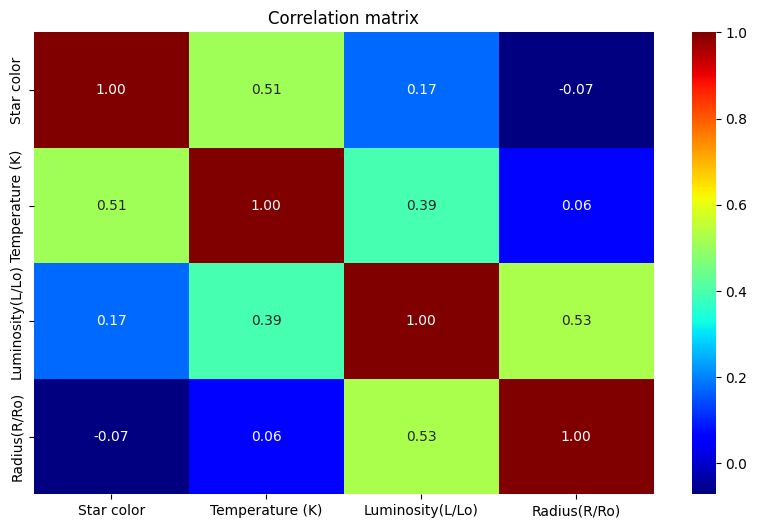

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(), annot=True,cmap='jet',fmt='.2f') #jet,copper, coolwarm
plt.title('Correlation matrix')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_mapped, test_size=size_of_test_split, random_state = random_seed)
x_test.describe()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro)
count,60.000000,6.000000e+01,60.000000
mean,0.237989,1.319947e-01,0.109806
std,0.268172,2.445007e-01,0.255036
min,0.017367,7.063643e-11,0.000000
25%,0.038136,1.167561e-09,0.000059
50%,0.052271,8.290363e-08,0.000321
75%,0.422637,1.771797e-01,0.012056
max,1.000000,1.000000e+00,0.845778


In [9]:
y_train[label_searched].unique()

array([4, 5, 3, 2, 0, 1])

In [10]:
from knn import knn
from bestNeighborsNumber import findBestNeighboursNumber
max_number_of_neighbours = 60
max_index, solutions = findBestNeighboursNumber(x_train, x_test, y_train, y_test, max_number_of_neighbours,label_searched)

1/60
2/60
3/60
4/60
5/60
6/60
7/60
8/60
9/60
10/60
11/60
12/60
13/60
14/60
15/60
16/60
17/60
18/60
19/60
20/60
21/60
22/60
23/60
24/60
25/60
26/60
27/60
28/60
29/60
30/60
31/60
32/60
33/60
34/60
35/60
36/60
37/60
38/60
39/60
40/60
41/60
42/60
43/60
44/60
45/60
46/60
47/60
48/60
49/60
50/60
51/60
52/60
53/60
54/60
55/60
56/60
57/60
58/60
59/60


Best solution is for k = 12 and achieved score of [86.66666667] %


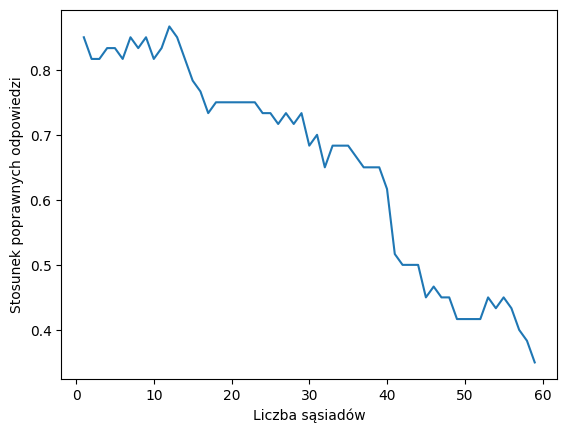

In [11]:
plt.plot(range(1,max_number_of_neighbours ),solutions)
plt.xlabel('Liczba sąsiadów')
plt.ylabel('Stosunek poprawnych odpowiedzi')
print(f"Best solution is for k = {max_index+1} and achieved score of {solutions[max_index]*100} %")

In [12]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train.values.ravel())
y_pred=nb_classifier.predict(x_test)
print(f"Naive Bayes algotithm have achieved score of {nb_classifier.score(x_test,y_test)*100}%")

Naive Bayes algotithm have achieved score of 85.0%
